In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings 
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')

In [10]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [12]:
a = np.log(train['COST'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [15]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

113
11892
4155
2689
359
1416
32
1847


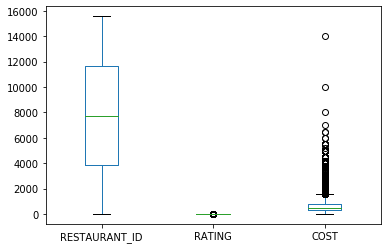

In [75]:
train.plot(kind='box')

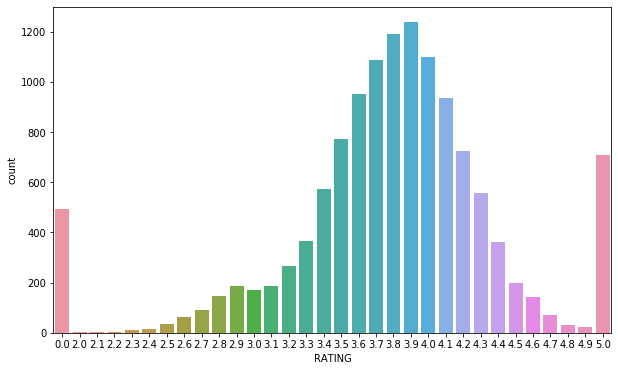

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(train['RATING'])

In [16]:
train['CITY'].value_counts()

Chennai                      2174
Bangalore                    2149
Hyderabad                    1819
Mumbai                       1722
New Delhi                    1321
                             ... 
Faridabd                        1
Gurgaon Haryana India           1
Beside Excellency Gardens       1
Karol Bagh                      1
Sector 51 Noida                 1
Name: CITY, Length: 359, dtype: int64

In [17]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [18]:
train['RATING'] = train['RATING'].astype('object')
test['RATING'] = test['RATING'].astype('object')

In [19]:

train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) 
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0})

In [21]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [22]:
train['RATING'] = train['RATING'].astype(float)
test['RATING'] = test['RATING'].astype(float)

In [23]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [24]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [25]:
train['source']= 'train'
test['source'] = 'test'

In [27]:
data=pd.concat([train, test],ignore_index=True)
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [28]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True)

In [29]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [30]:
data['votes_no'] = data['votes_no'].astype(float)

In [35]:
#filling missing data

In [31]:
data['votes_no'] = data['votes_no'].fillna(44.0)

In [32]:
data['RATING'] = data['RATING'].fillna(3.8)

In [33]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')

In [34]:
data['CITY'] = data['CITY'].fillna('Chennai')

In [36]:
#dropping 'votes' column
data = data.drop(['VOTES', 'votes'], axis=1)

In [37]:
#Feature Engineering

In [38]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [39]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [40]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [42]:
data['rat_vote'] = data['RATING'] * data['votes_no']

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

In [44]:
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 25)


In [45]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,104,6346,5156,340,277,161,4.1,800.0,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [46]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [47]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

In [48]:
X = Train.drop('COST', axis=1)
y = a

In [49]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X, y)

Ridge()

In [50]:
pred = r.predict(X)

In [51]:
pred

array([6.53588047, 6.93296746, 6.4931246 , ..., 6.78748621, 6.4616864 ,
       6.37552013])

In [52]:
x_test = Test

In [53]:
test_pred = r.predict(x_test)

In [54]:
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [55]:
a =pd.DataFrame(Predict, columns=['COST'])

In [56]:
a.head()

,COST
0,774
1,410
2,716
3,514
4,297


In [57]:
a.to_excel('cost1.xlsx')

In [58]:
# XGBOOST

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994)

In [62]:
xg = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500)

In [63]:
xgs = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=200,random_state=1994)

In [64]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
preds = xg.predict(X_test)

In [66]:
xgs.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=1994,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
predss = xgs.predict(X)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, log_loss
print(np.sqrt(mean_squared_error(predss, y)))

0.23920668143025894


In [69]:
test_predss = xgs.predict(Test)

In [70]:
Predicted=np.exp(test_predss)
Predicted=Predicted.astype(int)

In [71]:
b =pd.DataFrame(Predicted, columns=['COST'])
b.head()

,COST
0,1243
1,361
2,667
3,265
4,271


In [72]:
b.to_excel('cost2.xlsx')